---

# Decision Trees, Visualizing Decision Boundaries, and Evaluation

A __Decision Tree__ is a powerful machine learning algorithm that can be used for both regression and classification. Random Forests, which will be explored in another module, are composed of multiple Decision Trees. Decision Trees are particularly useful because they do not require extensive data preparation. 

In this module, we train, visualize, and make predictions with Decision Trees on an artificial dataset. 

---

The following packages are required to run the attached code:

- [Matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
- [Pandas](https://pandas.pydata.org/docs/)
- [Numpy](https://numpy.org/doc/)
- [Sklearn](https://scikit-learn.org/stable/)
- [Seaborn](https://seaborn.pydata.org)

In [1]:
# import the relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# The artificial data will be taken from sklearn 
from sklearn.datasets import make_classification

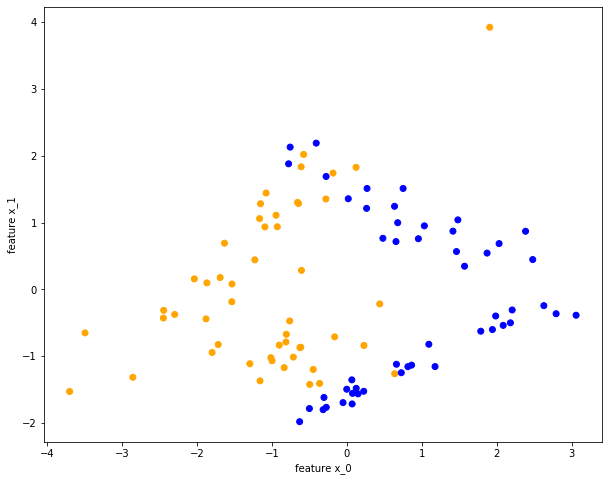

In [2]:
X, y = make_classification(n_features = 2, n_redundant = 0)
colors = ["orange" if label == 0 else "blue" for label in y]

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("feature x_0")
plt.ylabel("feature x_1")
plt.show()
plt.ion()

---

We train our Decision Tree model on a smaller subset of the training data set and evaluate it against the validation set, i.e. the training data excluding the smaller subset. We will use the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier) from sklearn.

---


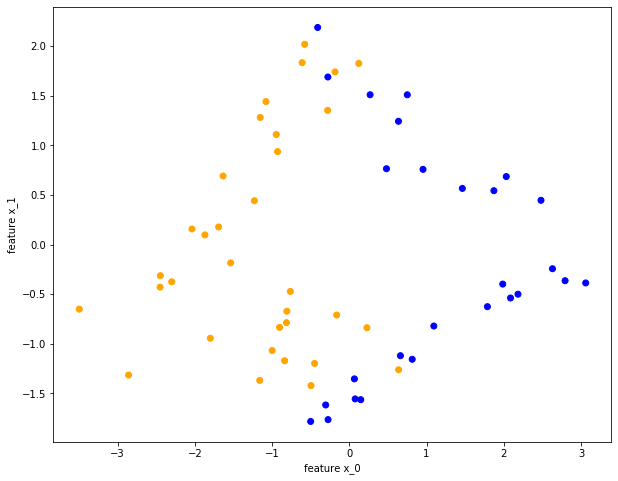

In [3]:
# Split data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

c_train = ["orange" if label == 0 else "blue" for label in y_train]
c_test = ["orange" if label == 0 else "blue" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("feature x_0")
plt.ylabel("feature x_1")
plt.show()
plt.ion()

In [4]:
# we store our features and labels 
features = ["x_0", "x_1"]
labels = ["orange", "blue"]

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

--- 

We visualize our Decision Tree in two different ways below. 

---

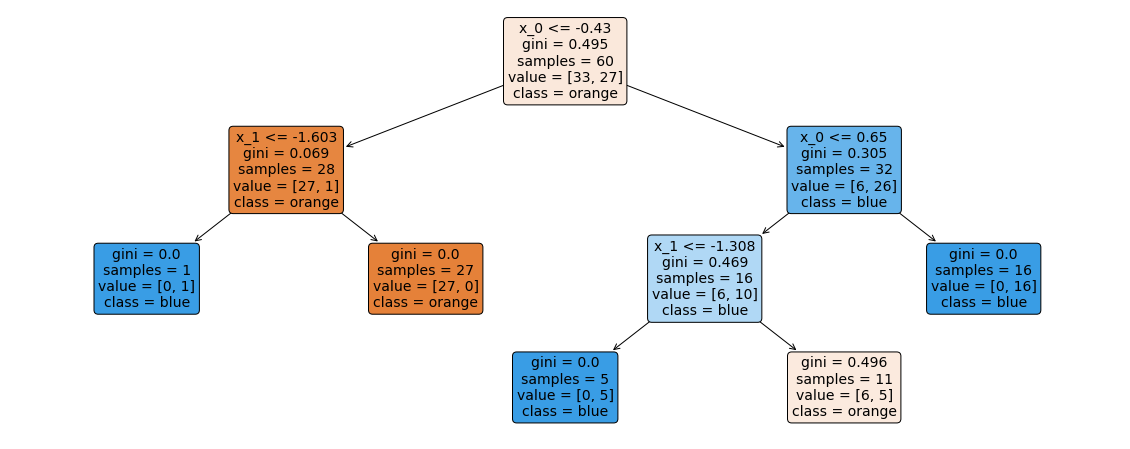

In [5]:
# build trees
from sklearn import tree

plt.figure(figsize=(20, 8))
a = tree.plot_tree(decision_tree, feature_names = features, class_names = labels, rounded = True, filled = True, 
                   fontsize=14)
plt.show()
plt.ion()

In [6]:
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = features)
print(tree_rules)

|--- x_0 <= -0.43
|   |--- x_1 <= -1.60
|   |   |--- class: 1
|   |--- x_1 >  -1.60
|   |   |--- class: 0
|--- x_0 >  -0.43
|   |--- x_0 <= 0.65
|   |   |--- x_1 <= -1.31
|   |   |   |--- class: 1
|   |   |--- x_1 >  -1.31
|   |   |   |--- class: 0
|   |--- x_0 >  0.65
|   |   |--- class: 1



---

Below, we show the decision boundaries from our trained tree. One issue with Decision Trees is that they tend to be sensitive to small variations in the training data, and in particular, sensitive to training set rotation.

---

Text(0, 0.5, 'feature: x_1')

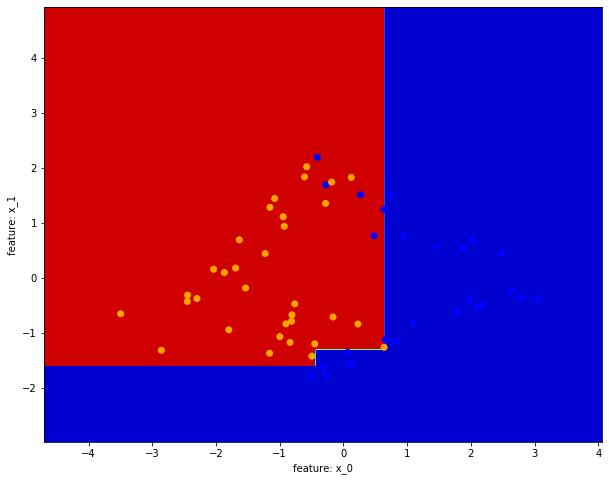

In [7]:
# Set a plot_step
plot_step = 0.02


plt.figure(figsize=(10, 8))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='jet_r')

plt.scatter(X_train[:, 0], X_train[:, 1], c=c_train)
plt.xlabel("feature: x_0")
plt.ylabel("feature: x_1")

---

## The Confusion Matrix.

In many instances we are interested in the following:
 * true positives -> predicted true and actually true
 * false positives -> predicted true and not actually true
 * false negatives -> predicted false but actually true
 * true negatives -> predicted false and actually false

All of these possibilities are contained in the confusion matrix. 

---

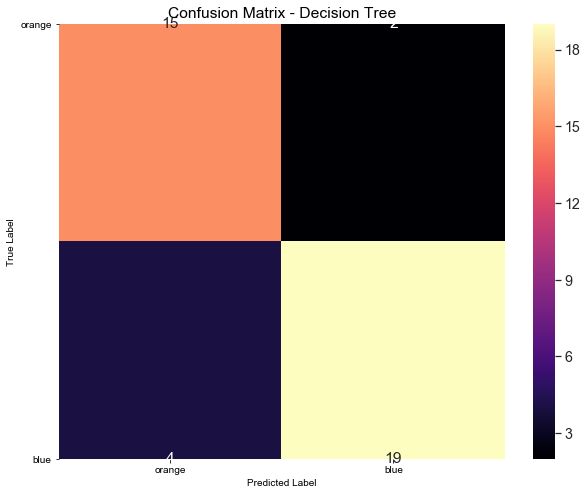

In [8]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma")

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=10)
ax.set_yticklabels(labels, rotation=0)
plt.show()
plt.ion()

Text(0, 0.5, 'feature: x_1')

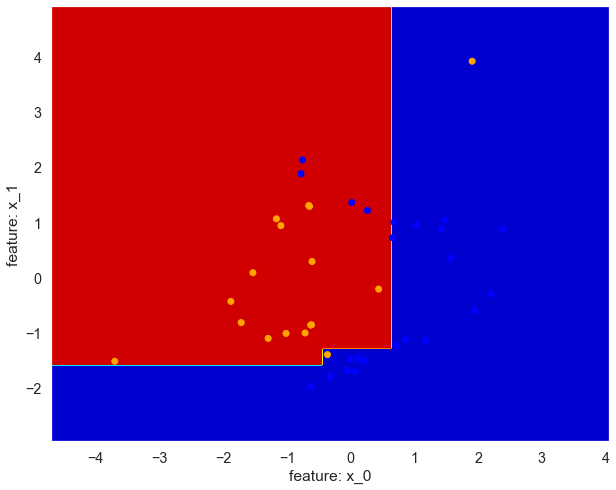

In [9]:
# Set a plot_step
plot_step = 0.02

plt.figure(figsize=(10, 8))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='jet_r')

plt.scatter(X_test[:, 0], X_test[:, 1], c=c_test)
plt.xlabel("feature: x_0")
plt.ylabel("feature: x_1")

---

## Evaluating model performance

We use four metrics to evaluate the performance of our model. 

- __Accuracy__: the number of correctly predicted observations divided by the total number of observations. Accuracy is the preferred measure of model performance when the number of false positives and false negatives is approximately the same. When this is not the case, its best to use other metrics in conjunction with the Accuracy score to evaluate model performance.  

- __Precision__: the number of correctly predicted positive observations divided by the the total number of predicted positive observations. A higher precision score indicates a lower false positive rate.

- __Recall__: the number of correctly predicted positive observations divided by the total number of all observations in the actual class (also referred to as Sensitivity).

- __F1 Score__: the weighted average of the Precision and Recall. As such, the F1 Score takes into account both false positives and false negatives, and can be more useful for evaluating the performance of a model than accuracy, especially when the data are not symmetric. 

---

In [10]:
# Accuracy Score
print(f"accuracy score = {metrics.accuracy_score(y_test, test_pred_decision_tree)}")

accuracy score = 0.85


In [11]:
# Precision Score
print(f"precision score")

precision = metrics.precision_score(y_test, test_pred_decision_tree, average = None)

precision_results = pd.DataFrame(precision, index=labels)
precision_results.rename(columns={0:"precision"}, inplace=True)
precision_results

precision score


,precision
orange,0.789474
blue,0.904762


In [12]:
# Recall and F1 Scores
print(metrics.classification_report(y_test, test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        17
           1       0.90      0.83      0.86        23

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.86      0.85      0.85        40



---

## Improvements to the model

Below, we use GridSearchCV, which performs cross validation on the model by performing the algorithm on multiple runs of the sets of the training set, and telling us how the model responds. For our purpose, we can change the max_depth and min_samples_split parameters which control how deep the tree goes, and the number of samples required to split an internal node.

---

In [13]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth': [1,2,3,4,5], 
                     'min_samples_split': [2,4,6,8,10]}]
scores = ['recall']
for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    dtc = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters,
        scoring = f'{score}_macro'
    )
    dtc.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(dtc.best_params_)
    print()
    print("Grid scores on development set:")
    means = dtc.cv_results_["mean_test_score"]
    stds = dtc.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,
                                 dtc.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for recall

Best parameters set found on development set:

{'max_depth': 1, 'min_samples_split': 2}

Grid scores on development set:
0.797 (+/-0.197) for {'max_depth': 1, 'min_samples_split': 2}
0.797 (+/-0.197) for {'max_depth': 1, 'min_samples_split': 4}
0.797 (+/-0.197) for {'max_depth': 1, 'min_samples_split': 6}
0.797 (+/-0.197) for {'max_depth': 1, 'min_samples_split': 8}
0.797 (+/-0.197) for {'max_depth': 1, 'min_samples_split': 10}
0.787 (+/-0.274) for {'max_depth': 2, 'min_samples_split': 2}
0.787 (+/-0.274) for {'max_depth': 2, 'min_samples_split': 4}
0.787 (+/-0.274) for {'max_depth': 2, 'min_samples_split': 6}
0.787 (+/-0.274) for {'max_depth': 2, 'min_samples_split': 8}
0.787 (+/-0.274) for {'max_depth': 2, 'min_samples_split': 10}
0.796 (+/-0.284) for {'max_depth': 3, 'min_samples_split': 2}
0.796 (+/-0.284) for {'max_depth': 3, 'min_samples_split': 4}
0.796 (+/-0.284) for {'max_depth': 3, 'min_samples_split': 6}
0.796 (+/-0.284) for {'max_depth': 

In [14]:
decision_tree = DecisionTreeClassifier(max_depth=2, min_samples_split = 2, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

Text(0, 0.5, 'feature: x_1')

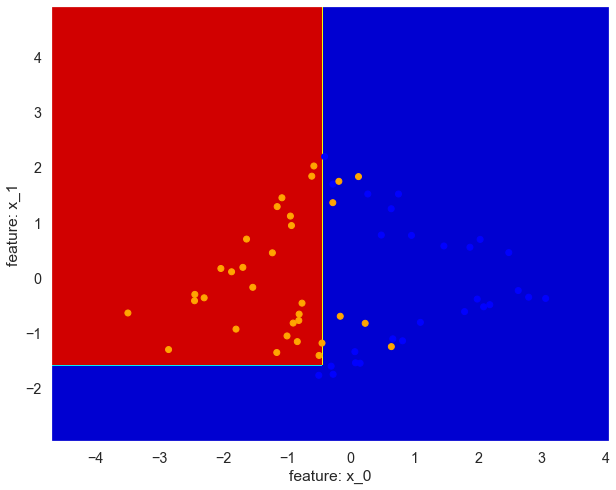

In [15]:
# Set a plot_step
plot_step = 0.02


plt.figure(figsize=(10, 8))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='jet_r')

plt.scatter(X_train[:, 0], X_train[:, 1], c=c_train)
plt.xlabel("feature: x_0")
plt.ylabel("feature: x_1")

In [19]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Accuracy Score
print(f"accuracy score = {metrics.accuracy_score(y_test, test_pred_decision_tree)}")

# Precision, Recall, and F1 Scores
print(metrics.classification_report(y_test, test_pred_decision_tree))

accuracy score = 0.875
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.88      0.91      0.89        23

    accuracy                           0.88        40
   macro avg       0.88      0.87      0.87        40
weighted avg       0.88      0.88      0.87        40



---

As expected, our accuracy and F1 scores improved slightly, and our precision and recall scores stayed about the same overall. 

---